<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_MachineLearning/blob/main/Tarea1_CarolinaHerreraAzolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

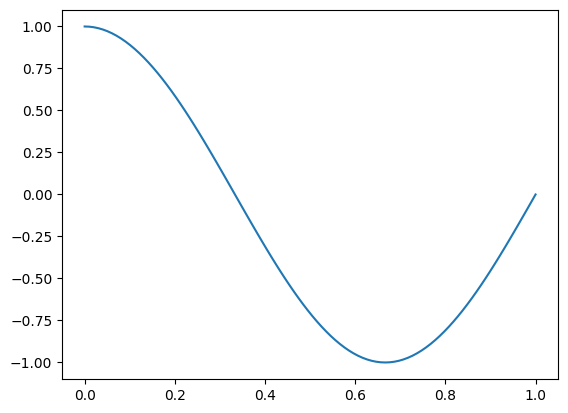

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def true_fun(X):
    return np.cos(1.5 * np.pi * X)
plt.plot(np.linspace(0, 1, 100), true_fun(np.linspace(0, 1, 100)))
plt.show()

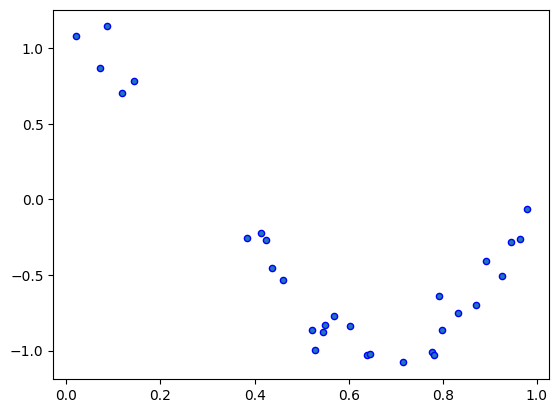

In [3]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.scatter(X, y, edgecolor='b', s=20)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X_vis = np.linspace(0, 1, 100)

3. Como primera actividad de la tarea deberás dividir el conjunto de datos en subconjuntos de entrenamiento y prueba, utilizando la función train_test_split de sklearn, con una proporción adecuada para cada uno, dado el tamaño del conjunto de datos.

In [14]:
# Separación entre datos de entrenamiento (70%) y de prueba (30%)

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.3, random_state=42)

# Números distribuidos por los grupos de entrenamiento y prueba

print(f"Número en el grupo de entrenamiento: {len(X_train)}")
print(f"Número en el grupo de prueba: {len(X_test)}")

Número en el grupo de entrenamiento: 21
Número en el grupo de prueba: 9


4. Entrena modelos de regresión lineal sobre el conjunto de entrenamiento generado, utilizando PolynomialFeatures con grados entre 1 y 30, para transformar las características de entrada de cada modelo y así modificar la complejidad de estos.



In [15]:
from sklearn.metrics import mean_squared_error

# Para definir los grados del polinomio de 1 a 30
degrees = list(range(1, 31))

# Creamos arrays para poder incorporar loss errores para el caso de entrenamiento y prueba
train_errors = []
test_errors = []

#Creamos un array para los modelos que entrenamremos
models = {}

# Entrenamos un modelo para cada grado de polinomio
for degree in degrees:

# Creamos las características polinomiales
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)


#Entrenamos el modelo de regresión lineal

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models[degree] = model

#Predecimos el conjunto para entrenamiento y prueba
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)


#Calculamos los errores
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    print(f"Para el {degree}: esta el error de entrenamiento = {train_errors[-1]}, Error de prueba = {test_errors[-1]}")


Para el 1: esta el error de entrenamiento = 0.2163143072509279, Error de prueba = 0.2802086389433493
Para el 2: esta el error de entrenamiento = 0.037467472582412537, Error de prueba = 0.012033539069739673
Para el 3: esta el error de entrenamiento = 0.01622022606783779, Error de prueba = 0.00446257855610871
Para el 4: esta el error de entrenamiento = 0.015215711904530818, Error de prueba = 0.003594835631468437
Para el 5: esta el error de entrenamiento = 0.013945764674873509, Error de prueba = 0.005343431010589543
Para el 6: esta el error de entrenamiento = 0.013822710775706761, Error de prueba = 0.005045410175691361
Para el 7: esta el error de entrenamiento = 0.013312230708301268, Error de prueba = 0.006258053027203326
Para el 8: esta el error de entrenamiento = 0.013236467610764843, Error de prueba = 0.0072166692185588925
Para el 9: esta el error de entrenamiento = 0.012359225815773736, Error de prueba = 0.011451706874084854
Para el 10: esta el error de entrenamiento = 0.0105791177708

5. Utilizando el conjunto de prueba, busca dentro de los modelos entrenados uno que presente subajuste, otro con sobreajuste y finalmente uno con ajuste adecuado. Identifique claramente cuál fue el grado utilizado por PolynomialFeatures para cada uno.



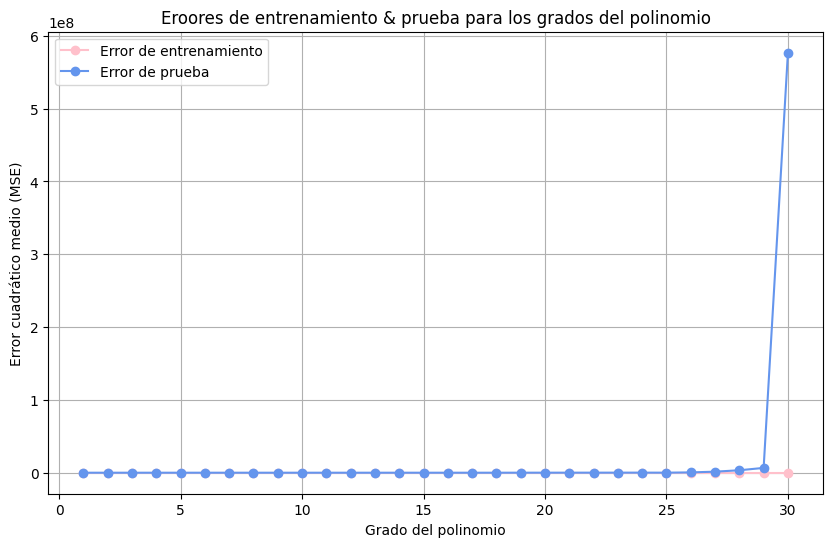

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(degrees, train_errors, label="Error de entrenamiento", color='pink', marker='o')
plt.plot(degrees, test_errors, label="Error de prueba",color='cornflowerblue', marker='o')

plt.xlabel("Grado del polinomio")
plt.ylabel("Error cuadrático medio (MSE)")
plt.legend()
plt.title("Eroores de entrenamiento & prueba para los grados del polinomio")
plt.grid(True)
plt.show()


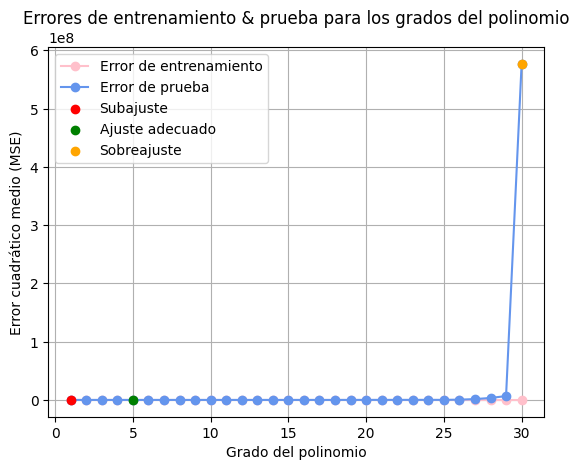

In [27]:
#Incluimos los puntos en grados de subajuste, ajuste adecuado y sobreajuste
plt.plot(degrees, train_errors, label='Error de entrenamiento', color='pink', marker='o')
plt.plot(degrees, test_errors, label='Error de prueba', color='cornflowerblue', marker='o')


error_entrenamiento_subajuste = train_errors[grado_subajuste - 1]
error_prueba_subajuste = test_errors[grado_subajuste - 1]

error_entrenamiento_ajuste = train_errors[grado_ajuste - 1]
error_prueba_ajuste = test_errors[grado_ajuste - 1]

error_entrenamiento_sobrecarga = train_errors[grado_sobrecarga - 1]
error_prueba_sobrecarga = test_errors[grado_sobrecarga - 1]

# Agregar puntos de subajuste, ajuste adecuado y sobreajuste al gráfico
plt.scatter([grado_subajuste], [error_prueba_subajuste], color='red', zorder=5, label='Subajuste')
plt.scatter([grado_ajuste], [error_prueba_ajuste], color='green', zorder=5, label='Ajuste adecuado')
plt.scatter([grado_sobrecarga], [error_prueba_sobrecarga], color='orange', zorder=5, label='Sobreajuste')

plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Errores de entrenamiento & prueba para los grados del polinomio')
plt.legend()
plt.grid(True)
plt.show()


6. Grafica de manera separada para cada modelo, las predicciones que realiza sobre el conjunto de datos X_vis, el cual se encuentra definido en la tercera celda. Compare visualmente estas predicciones con la forma de la función sinusoidal original y comente los resultados.

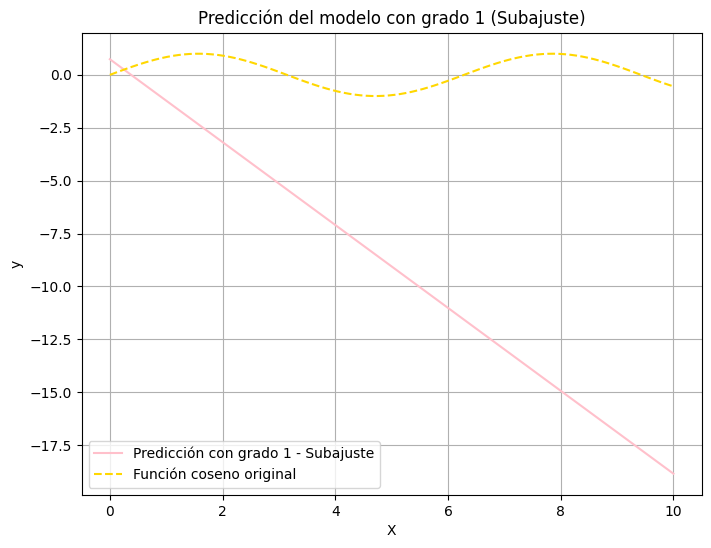

In [28]:
# Subajuste
plt.figure(figsize=(8, 6))
poly_subajuste = PolynomialFeatures(grado_subajuste)
X_vis_poly_subajuste = poly_subajuste.fit_transform(X_vis)
y_pred_subajuste = models[grado_subajuste].predict(X_vis_poly_subajuste)
plt.plot(X_vis, y_pred_subajuste, label=f"Predicción con grado 1 - Subajuste", color="pink")
plt.plot(X_vis, y_true, label="Función coseno original", color="gold", linestyle="--")
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Predicción del modelo con grado {grado_subajuste} (Subajuste)')
plt.legend()
plt.grid(True)
plt.show()

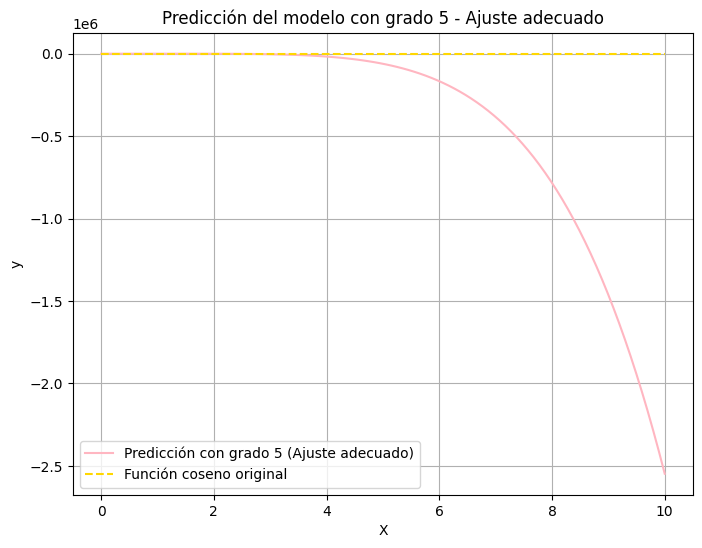

In [29]:
# Ajuste adecuado
plt.figure(figsize=(8, 6))
poly_ajuste = PolynomialFeatures(grado_ajuste)
X_vis_poly_ajuste = poly_ajuste.fit_transform(X_vis)
y_pred_ajuste = models[grado_ajuste].predict(X_vis_poly_ajuste)
plt.plot(X_vis, y_pred_ajuste, label=f"Predicción con grado {grado_ajuste} (Ajuste adecuado)", color="lightpink")
plt.plot(X_vis, y_true, label="Función coseno original", color="gold", linestyle="--")
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Predicción del modelo con grado 5 - Ajuste adecuado')
plt.legend()
plt.grid(True)
plt.show()

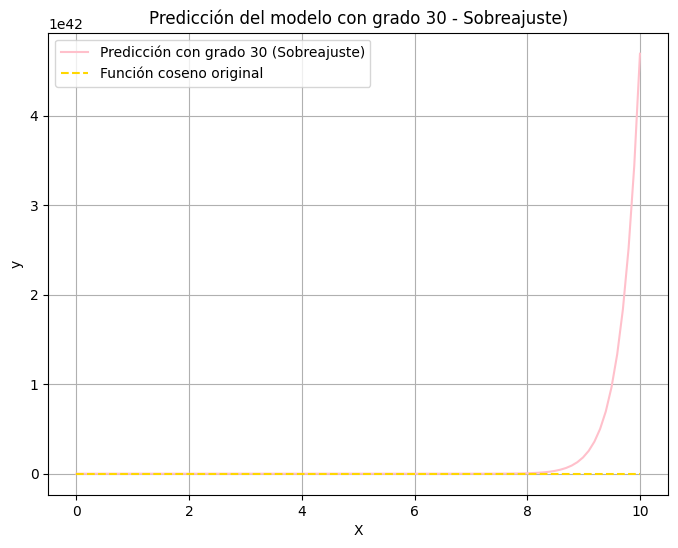

In [30]:
# Sobreajuste
plt.figure(figsize=(8, 6))
poly_sobrecarga = PolynomialFeatures(grado_sobrecarga)
X_vis_poly_sobrecarga = poly_sobrecarga.fit_transform(X_vis)
y_pred_sobrecarga = models[grado_sobrecarga].predict(X_vis_poly_sobrecarga)
plt.plot(X_vis, y_pred_sobrecarga, label=f"Predicción con grado {grado_sobrecarga} (Sobreajuste)", color="pink")
plt.plot(X_vis, y_true, label="Función coseno original", color="gold", linestyle="--")
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Predicción del modelo con grado 30 - Sobreajuste)')
plt.legend()
plt.grid(True)
plt.show()

**Respuesta Pregunta 6:**

A través de la implementación de los tres escenarios, concluimos lo siguiente:

- Gráfico de Subajuste (Grado 1):
En el caso del modelo de grado 1, la predicción se comporta como una línea recta. Este modelo es incapaz de capturar la complejidad de la función sinusoidal original, lo que lo convierte en una aproximación demasiado simple. Debido a que no refleja las variaciones presentes en los datos, el resultado no es una predicción confiable.
- Gráfico de Ajuste Adecuado (Grado 5):
Observando el gráfico del modelo con grado 5, podemos ver que la predicción se acerca mucho más a la forma de la función sinusoidal original. Este modelo es lo suficientemente complejo como para capturar las características importantes de la función, sin llegar a ser excesivamente complicado. Por lo tanto, proporciona un ajuste adecuado y una predicción más precisa.
- Gráfico de Sobreajuste (Grado 30):
En el caso del modelo con grado 30, se observa una curva exponencial que se dispara hacia valores extremadamente altos. Este comportamiento es típico del sobreajuste, donde el modelo se ajusta de manera excesiva a los datos de entrenamiento, lo que lo lleva a generar predicciones erráticas. Como resultado, se aleja mucho de una predicción precisa y confiable.